## Overview
The project uses exploratory data analysis to generate insights for a business stakeholder.

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.
 The project explorer what types of films are currently doing the best at the box office. Then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Specific Goals
1. Data integration: Integrate data to create a comprehensive data set
2. Exploratory Data Analysis(EDA): perform EDA to understand the distribution and trends in the data
3. Correlation Analysis: Analyze the correlation between production budgets and box office gross
4. Regression Modelling: Build regression models to predict box office gross based on production budgets and othe variables.
 5. seasonal trends
 6. Visualization: Create clear and insightful visualization to represent key findings

## Data Understanding
The dataset are collected from popular film industries such as;

. Box Office Mojo

. IMDB

. Rotten Tomatoes

. TheMovieDB

. The Numbers



# Objectives
Conduct an exploratory analysis of the dataset

1. load Dataset with pandas

2. Explore Data Distribution

3. Explore Correlations



# 1. Load the Dataset with pandas

In [1]:
# Import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

movie_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
movie_budget_df = pd.read_csv('data/tn.movie_budgets.csv', index_col=0)


In [2]:
# Inspect the content of dataframe
movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [3]:
movie_budget_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [4]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
movie_budget_df.info('movie_budget')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [6]:
# check for missing values in rt.movie_info
movie_info_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [7]:
# Check missing values in movie gross
movie_budget_df.isnull().sum()



release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [8]:
# Check for duplicates in rt movie info
movie_info_df.duplicated().value_counts()

False    1560
dtype: int64

In [9]:
# Check for duplicates in tn movie budget
movie_budget_df.duplicated().value_counts()

False    5782
dtype: int64

# 2. Explore Data Distribution
Summary statistics, visualization, and interpretive text describing the distribution of production budget, domestic gross and worldwide gross



# Summary Stasistics
key summary for production budget, domestic gross and worlwide gross are as follows

In [10]:
#convert monetary columns to numeric values for analysis
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$]', '', regex=True).replace(',', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$]', '', regex=True).replace(',', '', regex=True).astype(float)
movie_budget_df['worlwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$]', '', regex=True).replace(',', '', regex=True).astype(float)


In [11]:
statistics = movie_budget_df.describe()
statistics

,production_budget,domestic_gross,worlwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


# Interpretive Text

The mean production budget is approximately $31.6 million. with a median of $17 million. this indicates that while some movies have extremely high budgets, a significant number of movies are made with much lower budgets.

The domestic gross has a mean of $41.9 million and a median of $17.2 million, showing a similar pattern where a few high grossing movies kew the average.

The worlwide gross follows the same trend with a mean of $19.5 million and a media of $28 million.
 The large standard deviations in all three categories suggest a wide range of values, indicating variability in movie budgets and grosses

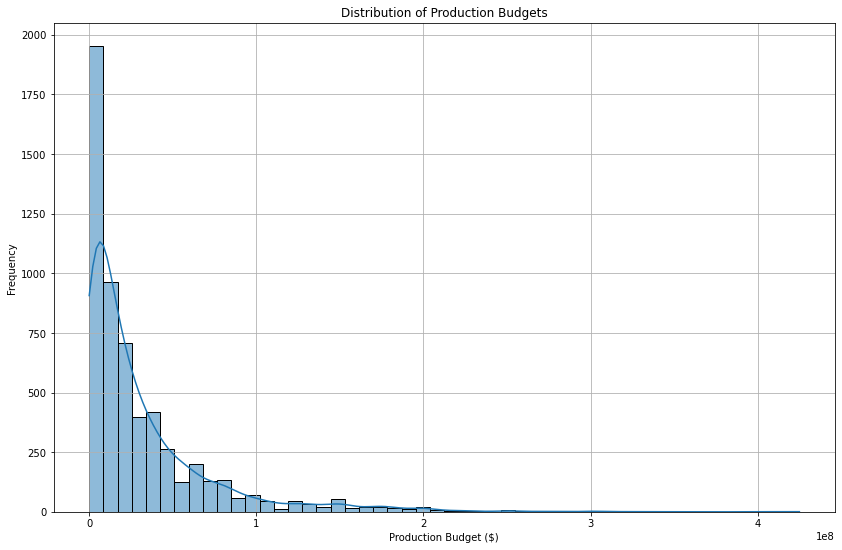

In [12]:
# Distribution of Production Budgets
plt.figure(figsize=(14, 9))
sns.histplot(movie_budget_df['production_budget'], bins=50, kde=True)
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

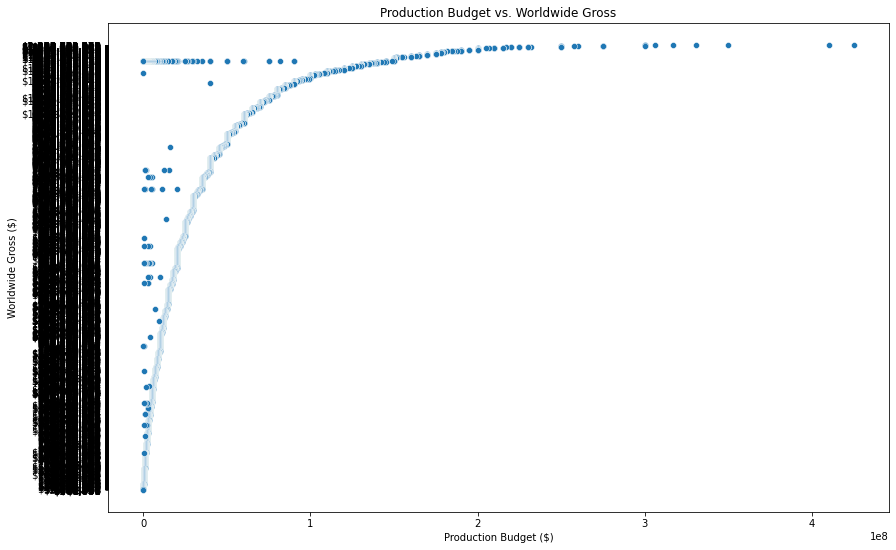

In [13]:
# Scatter Plot: Production Budget vs. Worldwide Gross
plt.figure(figsize=(14, 9))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budget_df)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()

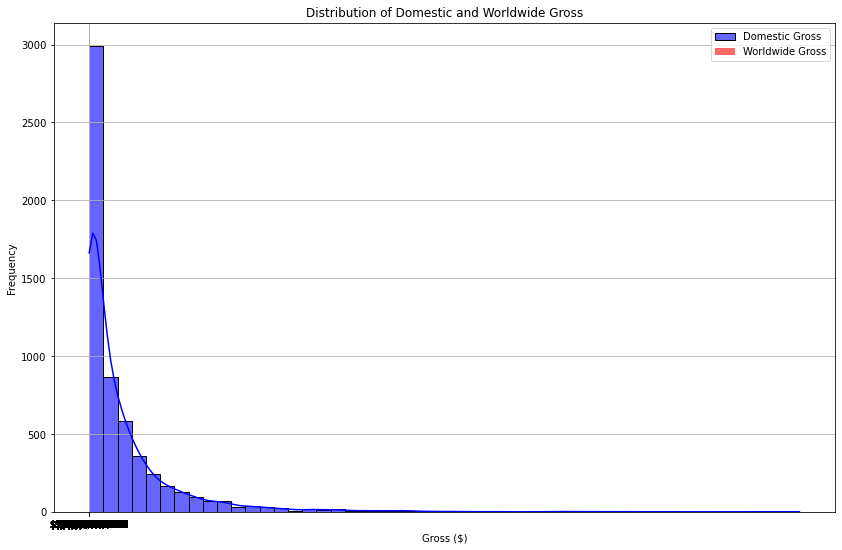

In [14]:
# Distribution of Domestic and Worldwide Gross
plt.figure(figsize=(14, 9))
sns.histplot(movie_budget_df['domestic_gross'], bins=50, color='blue', label='Domestic Gross', kde=True, alpha=0.6)
sns.histplot(movie_budget_df['worldwide_gross'], bins=50, color='red', label='Worldwide Gross', kde=True, alpha=0.6)
plt.title('Distribution of Domestic and Worldwide Gross')
plt.xlabel('Gross ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 3. Explore correlations

In [15]:
# Calculate the correlation matrix
correlation_matrix = movie_budget_df[['production_budget', 'domestic_gross', 'worlwide_gross']].corr()
correlation_matrix

,production_budget,domestic_gross,worlwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worlwide_gross,0.748306,0.938853,1.000000


Production budget and Domeestic budget: The correlation coefficient is 0.68, indicating a strong positive correlation. This suggests that higher production budgets are generally associated wit higher domestic gross revenues.

Production Budget and Worlwide Gross: The correlation coefficient is 0.74, indicating a strong correlation. This suggests that higher production budgets are generally associated with higher worldwide gross revenues.

Domestic Gross and Worldwide Gross: The correlation coefficient is 0.93, indicating an extremely strong positive correlation. This suggests that movies with higher domestic gross revenues almost always have higher worlwide gross revenues.

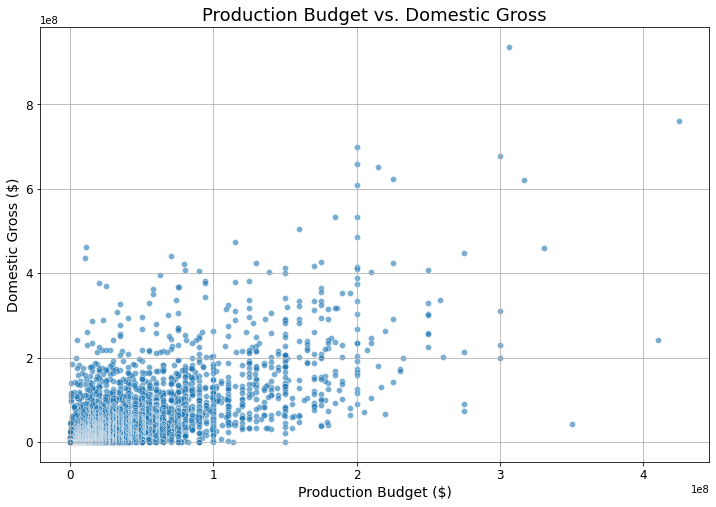

In [16]:
# Scattaer plot: production matrix vs domestic gross
plt.figure(figsize=(12, 8))
sns.scatterplot(x='production_budget', y='domestic_gross', data=movie_budget_df, alpha=0.6)
plt.title('Production Budget vs. Domestic Gross', fontsize=18)
plt.xlabel('Production Budget ($)', fontsize=14)
plt.ylabel('Domestic Gross ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

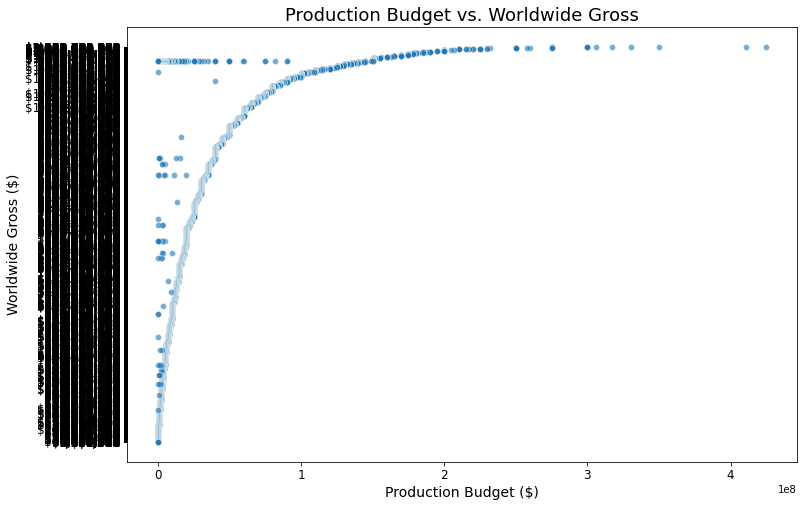

In [17]:
# Scatter Plot: Production Budget vs. Worldwide Gross
plt.figure(figsize=(12, 8))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budget_df, alpha=0.6)
plt.title('Production Budget vs. Worldwide Gross', fontsize=18)
plt.xlabel('Production Budget ($)', fontsize=14)
plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

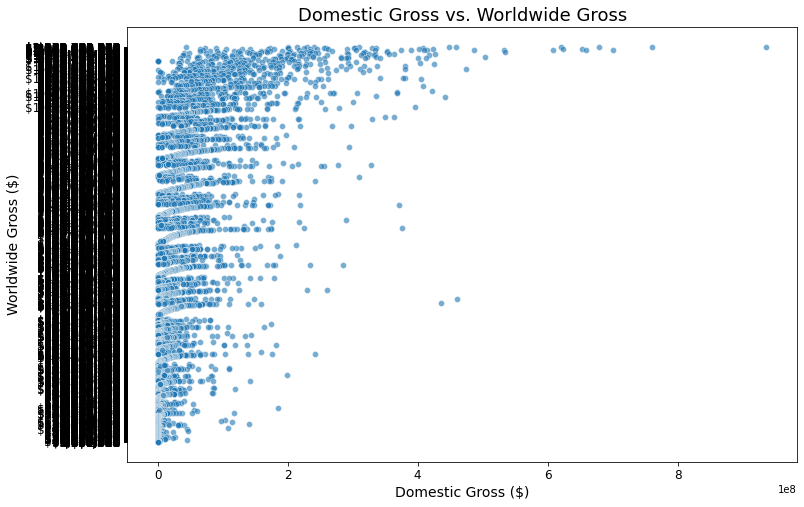

In [18]:
# Scatter Plot: Domestic Gross vs. Worldwide Gross
plt.figure(figsize=(12, 8))
sns.scatterplot(x='domestic_gross', y='worldwide_gross', data=movie_budget_df, alpha=0.6)
plt.title('Domestic Gross vs. Worldwide Gross', fontsize=18)
plt.xlabel('Domestic Gross ($)', fontsize=14)
plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Scatter plot interpretation

These analysis highlight the strong relationships between production budgets and gross revenues, both doemstically and worldwide, while also showing the almost deterministic relationship between domestic and worldwide grosses.

1. Production budget vs Domestic Gross
the scatter plot shows a clear positive trend, with most points following an upward slope. This indicates that movies with higher production budgets tend to earn more domestically, though there is still considerable variability.

2. Production Budget vs Worldwide Gross:
Similar to the prevoius scatter plot, this one shows a positive trend with higher production budgets generally leading to higher worldwide gross revenues. The spread of points is broader, indicating some movies perform exceptionarry well regardless of thier budget.

3. Domestic gross vs Worldwide Gross:
Thisscatter plot reveals a very strong linear relationship. Movies that perform well are very likely to also perform well worldwide. The tight clustering along the upward diagnoal line reinforces the high correlation coefficient observed.



## Conclusion

1. Invest in Production Budgets wisely:

- Higher production budgets are associated with higher domestic and worldwide gross revenues. The strong positive correlations indicate that well funded movies tend to perform better financially.

- Stakeholders should consider investing more in production budgets for projects with strong potential. however, it is essential to balance the budget with expected returns and avoid excessive spending without a clear strategy

2. Focus on domestic Performance:

- There is an extremely strong correlation between domestic gross and worldwide gross revenues(correlation of 0.93). This suggests that movies that perform well domestically are almost guaranteed to perform well globally.

- Focus on strategies to maximize domestic performance. This could include targeted marketing compaigns, strategic release dates, and leveraging domestic star power. success in the domestic market will likely translate into internationla success.

3. Leveraging Internaltional Markets:

- While there is a strong correlation between productionbudget and worlwide gross, some movies perform exceptionally well internationally regardless of their domestic performance or budget.

- Develop marketing strategies tailored for international markets, especially for films with global appeal. Consider localized marketing efforts, international premiers and partnerships with international distributors to maximize worldwide gross.

4. Optimize Resource Allocation:

- Not all high-budget movies are guaranteed to succeed, indicating that simply increasing the budget is not a foolproof strategy.

- Optimize resources allocation by investing in high-potential areas such as script development, special effects and marketing. Use data analytics to predict potential success and allocate budgets more efficiently.

5. Monitor Market Trends:
- The data shows trends over time, and its essential to keep up with market changes.

- COntinuously monitor market trends, audience preferences and emerging technologies. Adapt production and marketing strategies to align with current and future market conditions.

## Strategic Actions:
- Pre-Release Marketing: Invest in robudt pre-release marketing campaigns to generate buzz and anticipation, particularly in domestic markets.

- Talent Acquisition: Allocate budget towards acquiring top tier talent (i.e actors, directors writers) to increase the likelihood of both domestic and international success.

- Genre Focus: Analyze the performance of different genres and focus on those that historically perform well both domestically and internationally.

- Digital and Streaming Platforms: Leveraging digital and streaming platforms for global reach and additional revenue streams, especially for movies with niche appeal.

- Cross-Promitional Opportunities: Explore cross promotional opportunites with brands and franchises to enhance visibility and audience engagement.

In [19]:
# Clean the data for analysis
movie_info_df['box_office'] = movie_info_df['box_office'].replace('[\$,]', '', regex=True).astype(float)
movie_info_df['runtime'] = movie_info_df['runtime'].str.extract('(\d+)').astype(float)
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [20]:
# Handling Missing Values
movie_info_df['box_office'].fillna(movie_info_df['box_office'].median(), inplace=True)
movie_info_df['runtime'].fillna(movie_info_df['runtime'].median(), inplace=True)


In [21]:
# Handling Outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [22]:
handle_outliers(movie_info_df, 'box_office')
handle_outliers(movie_info_df, 'runtime')
handle_outliers(movie_budget_df, 'production_budget')
handle_outliers(movie_budget_df, 'domestic_gross')
handle_outliers(movie_budget_df, 'worldwide_gross')

In [24]:
# Standardize titles for merging
movie_info_df['genre'] = movie_info_df['genre'].str.lower().str.strip()
movie_budget_df['movie'] = movie_budget_df['movie'].str.lower().str.strip()

In [25]:
# Merge datasets on 'title' and 'movie'
merged_df = pd.merge(movie_info_df, movie_budget_df, left_on='genre', right_on='movie', how='inner')


In [26]:
# Drop duplicate columns
merged_df.drop(columns=['movie'], inplace=True)

In [27]:
# Display the merged DataFrame and the number of matched records
print(f"Number of matched records: {len(merged_df)}")
print(merged_df.head())

Number of matched records: 0
Empty DataFrame
Columns: [id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio, release_date, production_budget, domestic_gross, worldwide_gross, worlwide_gross]
Index: []


The chosen data set did not merge since they dont have matching records based on specified columns